Pirmiausia importuosiu kelias reikalingas analizei bibliotekas: 

In [15]:
import pandas as pd
print("Pandas imported successfully, version: "+pd.__version__)
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.1f}'.format
import scipy as sm
from scipy.stats import *
print("SciPy imported successfully, version: "+sm.__version__)
import numpy as np
print("Numpy imported successfully, version: "+np.__version__)
import seaborn as sns
print("Seaborn imported successfully, version: "+sns.__version__)
sns.set(style="whitegrid")

from sklearn.decomposition import PCA 

Pandas imported successfully, version: 0.25.1
SciPy imported successfully, version: 1.3.1
Numpy imported successfully, version: 1.16.5
Seaborn imported successfully, version: 0.9.0


Importuojamas OpenPowerlifting duomenų rinkinys kuriame įrašai apie rezultatus jėgos trikovės varžybose (surinkti iki 2019 balandžio). Nulines vertes pakeisiu į 'NaN'.

In [16]:
data_all = pd.read_csv('C:\\Users\\Ruslanas\\Desktop\\Projektas_rutos\\openpowerlifting.csv', sep=',', index_col=False, low_memory=False)
data_all.replace(0.0,np.NaN, inplace=True)
data_all.describe(include = 'all')

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
count,1423354,1423354,1423354,1423354,757519.0,786800,1415176,1406622.0,1410042,337580.0,333349.0,323842.0,3696.0,1031450.0,499779.0,493486.0,478485.0,9505.0,1276181.0,363544.0,356023.0,339947.0,9246.0,1081808.0,1313184.0,1423354,1304407.0,1304254.0,1304407.0,1273286.0,1093892,388884,1423354,1423354,1423354,941545,1423354
unique,412574,2,7,5,nan,16,4842,nan,224,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,124,nan,nan,nan,nan,1,176,222,5367,96,111,11599
top,Alan Aerts,M,SBD,Single-ply,nan,24-34,Open,nan,90,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,Yes,USA,THSPA,2017-02-18,USA,TX,World Championships
freq,214,1060189,1073237,787141,nan,244197,337927,nan,103156,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,541908,nan,nan,nan,nan,1093892,91333,290547,7001,856561,448753,32615
mean,NaN,NaN,NaN,NaN,31.5,NaN,NaN,84.2,NaN,114.1,92.2,30.1,71.4,174.0,83.9,55.1,-18.5,24.8,116.5,162.7,130.2,13.0,78.9,187.3,395.6,NaN,288.2,296.1,271.8,485.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,13.4,NaN,NaN,23.2,NaN,147.1,173.7,200.4,194.5,69.2,105.2,130.3,144.2,165.6,54.8,108.7,162.7,215.1,192.6,62.3,201.1,NaN,123.2,125.0,117.6,113.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.5,NaN,NaN,15.1,NaN,-555.0,-580.0,-600.5,-550.0,-477.5,-480.0,-507.5,-575.0,-500.0,-522.5,-461.0,-470.0,-587.5,-461.0,-410.0,2.5,NaN,1.5,1.5,1.4,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.0,NaN,NaN,66.7,NaN,90.0,68.0,-167.5,-107.8,122.5,57.5,-52.5,-140.0,-127.5,74.8,125.0,115.0,-210.0,-110.0,138.3,232.5,NaN,197.9,204.8,182.8,402.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.0,NaN,NaN,81.8,NaN,147.5,145.0,110.0,135.0,167.8,105.0,95.0,-60.0,77.5,111.1,180.0,177.5,117.5,145.2,185.0,378.8,NaN,305.2,312.0,285.9,478.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,40.0,NaN,NaN,99.2,NaN,200.0,205.0,192.5,205.0,217.5,145.0,145.0,117.5,157.5,150.0,226.8,230.0,205.0,210.0,230.0,540.0,NaN,374.6,383.8,355.3,559.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_all.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,nan,105.0,45.0,50.0,55.0,nan,55.0,110.0,120.0,130.0,nan,130.0,290.0,4,324.2,324.2,286.4,511.1,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,nan,120.0,55.0,62.5,67.5,nan,67.5,130.0,140.0,145.0,nan,145.0,332.5,2,378.1,378.1,334.2,595.6,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,nan,nan,nan,nan,nan,27.5,32.5,-35.0,nan,32.5,nan,nan,nan,nan,nan,32.5,1,38.6,38.6,34.1,314.0,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,nan,105.0,67.5,72.5,-75.0,nan,72.5,132.5,-140.0,-140.0,nan,132.5,310.0,3,345.6,345.6,305.4,547.0,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,nan,140.0,70.0,75.0,80.0,nan,80.0,150.0,160.0,170.0,nan,170.0,390.0,3,321.2,338.9,274.6,550.1,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,135.0,142.5,nan,142.5,72.5,77.5,82.5,nan,82.5,125.0,135.0,145.0,nan,145.0,370.0,5,354.7,354.7,312.2,596.2,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
6,Ash Morgan,F,SBD,Wraps,23.0,20-23,F-OR,59.8,60,115.0,125.0,-135.0,nan,125.0,65.0,70.0,-75.0,nan,70.0,130.0,140.0,150.0,nan,150.0,345.0,1,385.6,385.6,340.7,612.2,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
7,Belinda Moloney,F,SBD,Wraps,35.0,35-39,F-OR,80.4,82.5,120.0,130.0,140.0,nan,140.0,67.5,72.5,77.5,nan,77.5,125.0,140.0,152.5,nan,152.5,370.0,5,337.6,337.6,296.0,575.9,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
8,Briony Williams,F,SBD,Wraps,36.0,35-39,F-OR,108.0,110,180.0,200.0,220.0,nan,220.0,90.0,100.0,nan,nan,100.0,200.0,nan,nan,nan,200.0,520.0,1,424.5,424.5,361.6,716.6,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
9,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.8,75,180.0,190.0,200.0,nan,200.0,90.0,95.0,-97.5,nan,95.0,160.0,170.0,180.0,nan,180.0,475.0,1,452.3,452.3,397.9,762.4,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


Apskaičiuosiu dalyvių amžiaus (>14 metų) vidurkį. 

In [17]:
idx = data_all.Age > 14
age_data = data_all[idx]
age_mean= age_data['Age'].mean()
print ("age (>14) mean is: ", age_mean)


age (>14) mean is:  31.80819548095511


Apskaičiuosiu visų rungčių bandymų vidurkius atmetus nesėkmingų bandymų vertes su minuso ženklu, kurios iškraipo vidurkius. 

In [18]:
squat1 = data_all.Squat1Kg > 0
squat1_data = data_all[squat1]
squat1_mean= squat1_data['Squat1Kg'].mean()
print ("Squat1Kg mean is: ", squat1_mean)

Squat1Kg mean is:  169.51681859473408


In [19]:
best_squat = data_all.Best3SquatKg > 0
best_squat_data = data_all[best_squat]
best_squat_mean= best_squat_data['Best3SquatKg'].mean()
print ("Best3SquatKg mean is: ", best_squat_mean)

Best3SquatKg mean is:  174.50300323288678


In [20]:
best_bench = data_all.Best3BenchKg > 0
best_bench_data = data_all[best_bench]
best_bench_mean= best_bench_data['Best3BenchKg'].mean()
print ("Best3BenchKg mean is: ", best_bench_mean)

Best3BenchKg mean is:  116.96298543994922


In [21]:
best_deadlift = data_all.Best3DeadliftKg > 0
best_deadlift_data = data_all[best_deadlift]
best_deadlift_mean= best_deadlift_data['Best3DeadliftKg'].mean()
print ("Best3DeadliftKg mean is: ", best_deadlift_mean)

Best3DeadliftKg mean is:  187.50964014326271


In [106]:
totalkg = data_all.TotalKg > 0
totalkg_data = data_all[totalkg]
totalkg_mean= totalkg_data['TotalKg'].mean()
print ("TotalKg mean is: ", totalkg_mean)

TotalKg mean is:  395.61480976005225


Ar duomenys pasiskirstę normaliai, patikrinsiu vizualiniu būdu (histogramomis):

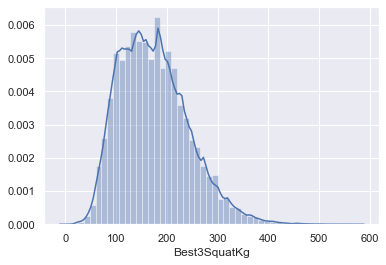

In [46]:
best_squat_nonan = best_squat_data['Best3SquatKg'].dropna(axis=0, how='any', inplace=False)

x = best_squat_nonan

sns.set_style('darkgrid')
sns.distplot(x)


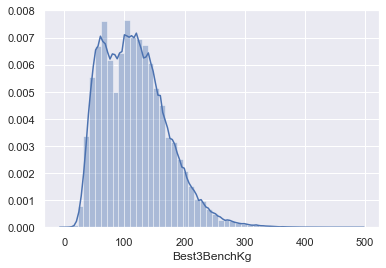

In [48]:
best_bench_nonan = best_bench_data['Best3BenchKg'].dropna(axis=0, how='any', inplace=False)

x = best_bench_nonan

sns.set_style('darkgrid')
sns.distplot(x)


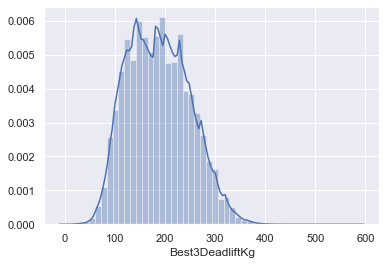

In [49]:
best_deadlift_nonan = best_deadlift_data['Best3DeadliftKg'].dropna(axis=0, how='any', inplace=False)

x = best_deadlift_nonan

sns.set_style('darkgrid')
sns.distplot(x)

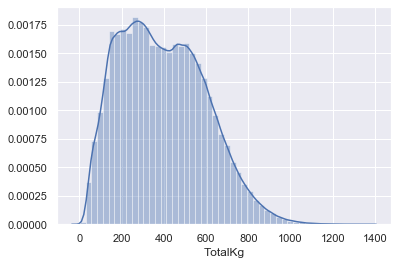

In [62]:
Totalkg = data_all.TotalKg > 0
Totalkg_data = data_all[Totalkg]
Totalkg_nonan = Totalkg_data['TotalKg'].dropna(axis=0, how='any', inplace=False)
x = Totalkg_nonan
sns.set_style('darkgrid')
sns.distplot(x)

Pasiskirstymuose matyti po du maksimumus, todėl reikia atskirti moterų ir vyrų rezultatus:

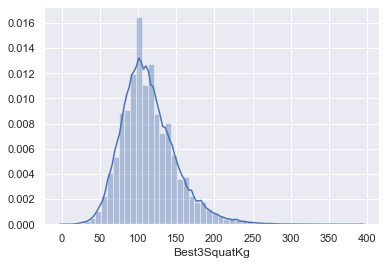

In [89]:

best_squat_f = data_all.Sex == 'F'
best_squat_goodlift = data_all.Best3SquatKg > 0
best_squat_data_f = data_all[best_squat_f&best_squat_goodlift]

best_squat_f_nonan = best_squat_data_f['Best3SquatKg'].dropna(axis=0, how='any', inplace=False)
x = best_squat_f_nonan

sns.set_style('darkgrid')
sns.distplot(x)

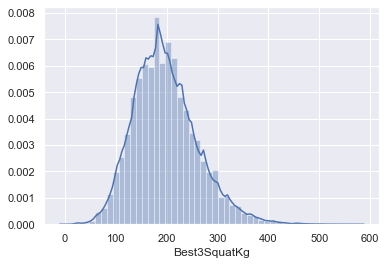

In [90]:

best_squat_m = data_all.Sex == 'M'
best_squat_data_m = data_all[best_squat_m&best_squat_goodlift]
best_squat_m_nonan = best_squat_data_m['Best3SquatKg'].dropna(axis=0, how='any', inplace=False)
x = best_squat_m_nonan

sns.set_style('darkgrid')
sns.distplot(x)

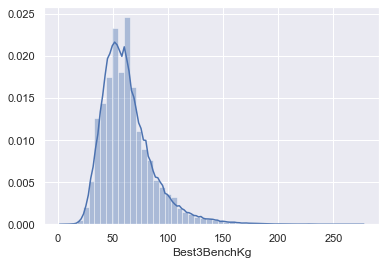

In [91]:
best_bench_f = data_all.Sex == 'F'
best_bench_goodlift = data_all.Best3BenchKg > 0
best_bench_data_f = data_all[best_bench_f&best_bench_goodlift]
best_bench_f_nonan = best_bench_data_f['Best3BenchKg'].dropna(axis=0, how='any', inplace=False)
x = best_bench_f_nonan

sns.set_style('darkgrid')
sns.distplot(x)

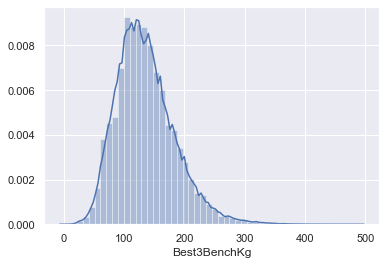

In [92]:
best_bench_m = data_all.Sex == 'M'
best_bench_data_m = data_all[best_bench_m&best_bench_goodlift]
best_bench_m_nonan = best_bench_data_m['Best3BenchKg'].dropna(axis=0, how='any', inplace=False)
x = best_bench_m_nonan

sns.set_style('darkgrid')
sns.distplot(x)

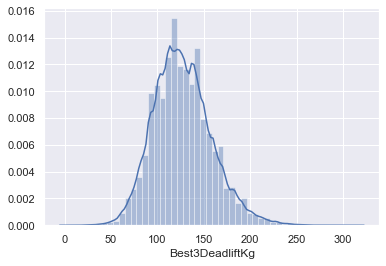

In [93]:
best_deadlift_f = data_all.Sex == 'F'
best_deadlift_goodlift = data_all.Best3DeadliftKg > 0
best_deadlift_data_f = data_all[best_deadlift_f&best_deadlift_goodlift]
best_deadlift_f_nonan = best_deadlift_data_f['Best3DeadliftKg'].dropna(axis=0, how='any', inplace=False)
x = best_deadlift_f_nonan

sns.set_style('darkgrid')
sns.distplot(x)

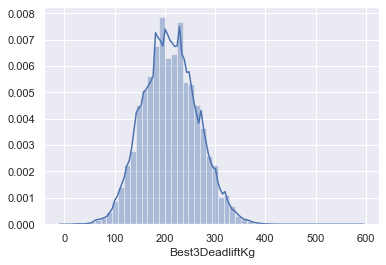

In [94]:
best_deadlift_f = data_all.Sex == 'M'
best_deadlift_data_m = data_all[best_deadlift_f&best_deadlift_goodlift]
best_deadlift_m_nonan = best_deadlift_data_m['Best3DeadliftKg'].dropna(axis=0, how='any', inplace=False)
x = best_deadlift_m_nonan

sns.set_style('darkgrid')
sns.distplot(x)

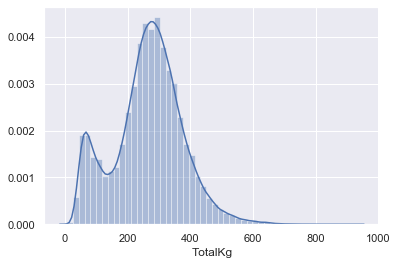

In [96]:
Totalkg_goodlift = data_all.TotalKg > 0
Totalkg_f = data_all.Sex == 'F'
Totalkg_f_data = data_all[Totalkg_f&Totalkg_goodlift]
Totalkg_f_nonan = Totalkg_f_data['TotalKg'].dropna(axis=0, how='any', inplace=False)
x = Totalkg_f_nonan
sns.set_style('darkgrid')
sns.distplot(x)

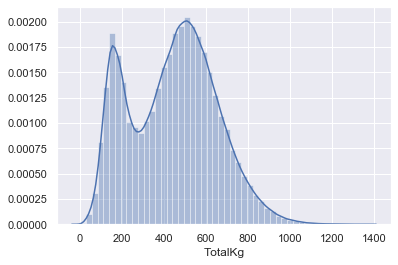

In [97]:
Totalkg_goodlift = data_all.TotalKg > 0
Totalkg_m = data_all.Sex == 'M'
Totalkg_m_data = data_all[Totalkg_m&Totalkg_goodlift]
Totalkg_m_nonan = Totalkg_m_data['TotalKg'].dropna(axis=0, how='any', inplace=False)
x = Totalkg_m_nonan
sns.set_style('darkgrid')
sns.distplot(x)

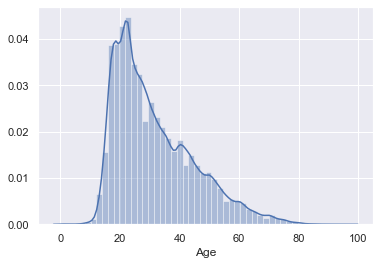

In [98]:
age_nonan = data_all['Age'].dropna(axis=0, how='any', inplace=False)

x = age_nonan

sns.set_style('darkgrid')
sns.distplot(x)

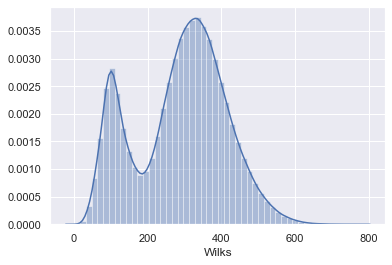

In [109]:



wilks_nonan = data_all['Wilks'].dropna(axis=0, how='any', inplace=False)

x = wilks_nonan

sns.set_style('darkgrid')
sns.distplot(x)

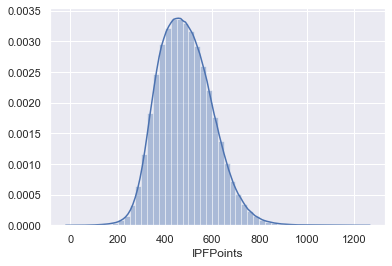

In [104]:

ipfpoints_nonan = data_all['IPFPoints'].dropna(axis=0, how='any', inplace=False)

x = ipfpoints_nonan

sns.set_style('darkgrid')
sns.distplot(x)

In [ ]:
McCulloch	Glossbrenner

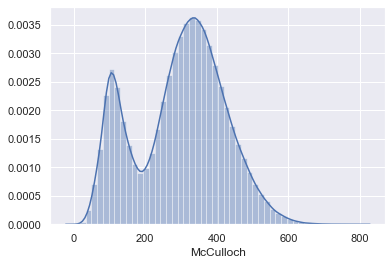

In [107]:
mcculloch_nonan = data_all['McCulloch'].dropna(axis=0, how='any', inplace=False)

x = mcculloch_nonan

sns.set_style('darkgrid')
sns.distplot(x)

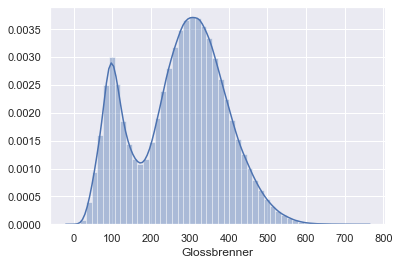

In [108]:
glossbrenner_nonan = data_all['Glossbrenner'].dropna(axis=0, how='any', inplace=False)

x = glossbrenner_nonan

sns.set_style('darkgrid')
sns.distplot(x)

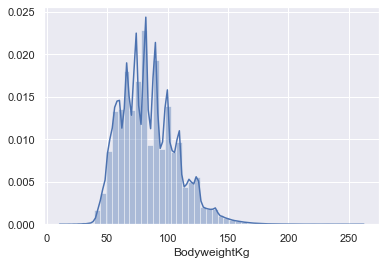

In [110]:
bodyweightkg_nonan = data_all['BodyweightKg'].dropna(axis=0, how='any', inplace=False)

x = bodyweightkg_nonan

sns.set_style('darkgrid')
sns.distplot(x)